In [3]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit

In [4]:
matplotlib.rcParams.update({'font.size': 22})

In [137]:
times_unsort = np.array([560,420,290,160,210,350, 490])
counts_unsort = np.array([80, 100, 164, 597, 308, 128, 84])

In [138]:
sort_args = np.argsort(times_unsort)
times = times_unsort[sort_args]
counts = counts_unsort[sort_args]

In [139]:
def fit_func(t, *p):
    a = p[0]
    b = p[1]
    tau = p[2]
    return a + b * np.exp(-t*np.log(2)/tau)

In [140]:
def fit_func2(t, *p):
    a = p[0]
    b = p[1]
    tau = 300/np.log(2)
    return a + b * np.exp(-t*np.log(2)/tau)

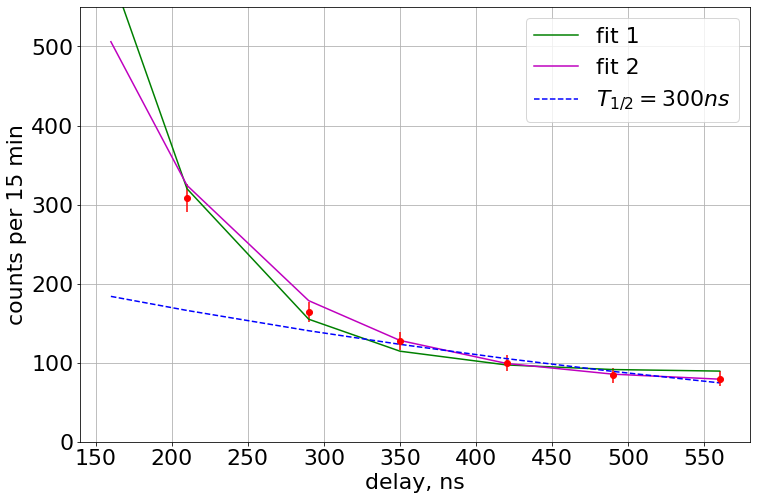

In [141]:
plt.figure(figsize=(12, 8))

plt.errorbar(times, counts, yerr=np.sqrt(counts), fmt='or')

coeff, _ = curve_fit(fit_func, times, counts, p0=[100, 1, 100*np.log(2)])
plt.plot(times, fit_func(times, *coeff), '-g', label=r'fit 1')

coeff3, _ = curve_fit(fit_func, times[3:], counts[3:], p0=[100, 1, 300*np.log(2)])
plt.plot(times, fit_func(times, *coeff3), '-m', label=r'fit 2')

coeff2, _ = curve_fit(fit_func2, times[3:], counts[3:], p0=[100, 1])
plt.plot(times, fit_func2(times, *coeff2), '--b', label=r'$T_{1/2} = 300 ns$')

plt.xlabel('delay, ns')
plt.ylabel('counts per 15 min')
plt.legend()

plt.ylim(0, 550)
plt.grid()

In [135]:
coeff[2]*np.log(2)

36.28045637340218

In [136]:
coeff3[2]*np.log(2)

580657.2101349639

In [126]:
60+33

93

In [128]:
39/(93/15)

6.290322580645161